##Import libraries

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import applications
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D
from keras.models import load_model
from keras import backend as K
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
cd gdrive/MyDrive/PetImages

/content/gdrive/MyDrive/PetImages


##Creating validation sets

In [6]:
#creating validation set for dogs
import shutil
import os 
x = []
x2 = []
for i in os.listdir('train/dogs/'):
  x.append(i)

x2 = x[len(x)-400:]

for i in x2:
  src_path = os.path.join('train/dogs/', i)
  shutil.copyfile(src_path, os.path.join('validation/dogs/', i))

In [8]:
#creating validation set for cats
import shutil
x = []
x2 = []
for i in os.listdir('train/cats/'):
  x.append(i)

x2 = x[len(x)-400:]

for i in x2:
  src_path = os.path.join('train/cats/', i)
  shutil.copyfile(src_path, os.path.join('validation/cats/', i))

##Initialization

In [9]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = r'train'
validation_data_dir = r'validation'
nb_train_samples = 3410
nb_validation_samples = 800
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

##Model

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

##Data Preprocessing

In [11]:
# augmentation configuration used for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,  
        target_size=(150, 150),  
        batch_size=batch_size,
        class_mode='binary')  

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 3000 images belonging to 2 classes.
Found 1400 images belonging to 2 classes.


##Model Train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
 89/125 [====================>.........] - ETA: 12s - loss: 0.7051 - accuracy: 0.5014

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


125/125 [==============================] - 150s 1s/step - loss: 0.7022 - accuracy: 0.5181 - val_loss: 0.7013 - val_accuracy: 0.5213
Epoch 2/50
125/125 [==============================] - 95s 765ms/step - loss: 0.6796 - accuracy: 0.5735 - val_loss: 0.6618 - val_accuracy: 0.6200
Epoch 3/50
125/125 [==============================] - 70s 556ms/step - loss: 0.6722 - accuracy: 0.5899 - val_loss: 0.6629 - val_accuracy: 0.6413
Epoch 4/50
125/125 [==============================] - 64s 512ms/step - loss: 0.6616 - accuracy: 0.6345 - val_loss: 0.6387 - val_accuracy: 0.6263
Epoch 5/50
125/125 [==============================] - 62s 496ms/step - loss: 0.6545 - accuracy: 0.6024 - val_loss: 0.6175 - val_accuracy: 0.6450
Epoch 6/50
125/125 [==============================] - 61s 489ms/step - loss: 0.6544 - accuracy: 0.6135 - val_loss: 0.6107 - val_accuracy: 0.6775
Epoch 7/50
125/125 [==============================] - 60s 481ms/step - loss: 0.6393 - accuracy: 0.6441 - val_loss: 0.6302 - val_accuracy: 0.636

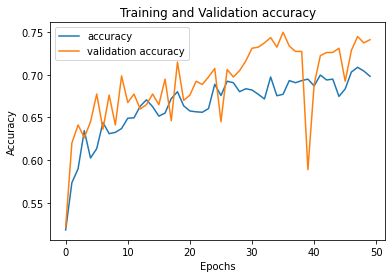

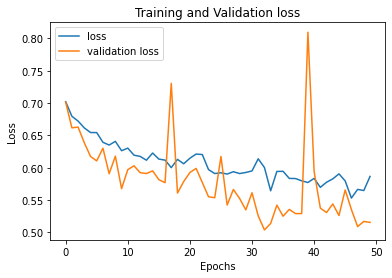

In [13]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)

## plot accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation accuracy')
plt.legend(['accuracy','validation accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## plot loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.legend(['loss','validation loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

model.save_weights('first_try.h5')

In [ ]:
%cp ./first_try.h5 ./PetImages/